# ═══════════════════════════════════════════════════════════════════════════════
# NOTEBOOK 08: QUALITATIVE FEEDBACK ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════════

**Purpose**: Analyze open-ended feedback to complement quantitative AIRS findings

**Research Questions**:
- What themes emerge from participant open-ended feedback?
- Do themes differ between Academic, Professional, and Leader populations?
- How do qualitative insights align with quantitative findings?

**Design Decisions**:
- **Sample**: Participants who provided open feedback (N=243 substantive, 46.5% response rate)
- **Method**: Keyword-based thematic categorization
- **Themes**: 10 themes identified (Positive Experience, Work/Productivity, Human Element, Learning/Education, Accuracy/Reliability, Future/Potential, Concerns/Caution, Ethics/Privacy, Cost/Access, Job Replacement)
- **Groups**: Academic (N≈94), Professional (N≈83), Leader (N≈66)

**3-Group Classification** (consistent with NB07):
| Role_Type | Role_Category | Description |
|-----------|---------------|-------------|
| Academic | FT_Student, PT_Student | Full-time and part-time students |
| Professional | IC, Freelancer, Unemployed, Other | Individual contributors, self-employed |
| Leader | Manager, Executive | Organizational leadership roles |

**Outputs**:
- Theme prevalence by population (3-group)
- Representative quotes per theme
- Qualitative-quantitative alignment analysis

```mermaid
flowchart TB
    subgraph Input["Open Feedback"]
        A["N=243 substantive<br/>(46.5% response rate)"]
    end
    
    subgraph Groups["3-Group Classification"]
        G1["🎓 Academic<br/>N=94"]
        G2["💼 Professional<br/>N=83"]
        G3["👔 Leader<br/>N=66"]
    end
    
    subgraph Themes["10 Emergent Themes"]
        T1["✅ Positive Experience (24.7%)"]
        T2["💼 Work/Productivity (19.3%)"]
        T3["🧑 Human Element (13.6%)"]
        T4["📚 Learning/Education (13.6%)"]
        T5["🎯 Accuracy/Reliability (10.7%)"]
        T6["🔮 Future/Potential (5.8%)"]
        T7["⚠️ Concerns/Caution (5.8%)"]
        T8["🔒 Ethics/Privacy (5.3%)"]
        T9["💰 Cost/Access (2.5%)"]
        T10["👷 Job Replacement (1.6%)"]
    end
    
    A --> G1 & G2 & G3
    G1 & G2 & G3 --> T1 & T2 & T3 & T4 & T5 & T6 & T7 & T8 & T9 & T10
    
    style G1 fill:#1565c0,color:#fff
    style G2 fill:#2e7d32,color:#fff
    style G3 fill:#7b1fa2,color:#fff
```

---

## 1. Setup & Data Loading

### 1.1 Environment Setup

In [1]:
import os
import json
import re
import warnings
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

RANDOM_SEED = 67
np.random.seed(RANDOM_SEED)

print("=" * 80)
print("PHASE 8: QUALITATIVE FEEDBACK ANALYSIS")
print("=" * 80)
print(f"\n✓ Environment configured (seed={RANDOM_SEED})")

PHASE 8: QUALITATIVE FEEDBACK ANALYSIS

✓ Environment configured (seed=67)


### 1.2 Data Loading

In [2]:
# Load EFA and CFA samples
df_efa = pd.read_csv('data/AIRS_experiment.csv')
df_cfa = pd.read_csv('data/AIRS_holdout.csv')

# Combine into full sample
df_full = pd.concat([df_efa, df_cfa], ignore_index=True)

# Create 3-group classification (consistent with NB07)
def classify_role_type(role):
    """Classify Role_Category into 3-group Role_Type"""
    if role in ['FT_Student', 'PT_Student']:
        return 'Academic'
    elif role in ['Manager', 'Executive']:
        return 'Leader'
    else:  # IC, Freelancer, Unemployed, Other
        return 'Professional'

df_full['Role_Type'] = df_full['Role_Category'].apply(classify_role_type)

# Filter to responses with open feedback
df_feedback = df_full[df_full['Open_Feedback'].notna()].copy()
df_feedback['Open_Feedback'] = df_feedback['Open_Feedback'].str.strip()

# Remove very short/non-substantive responses
MIN_RESPONSE_LENGTH = 10
df_substantive = df_feedback[df_feedback['Open_Feedback'].str.len() >= MIN_RESPONSE_LENGTH].copy()

print(f"Full Sample: N={len(df_full)}")
print(f"With feedback: N={len(df_feedback)} ({len(df_feedback)/len(df_full)*100:.1f}%)")
print(f"Substantive (≥{MIN_RESPONSE_LENGTH} chars): N={len(df_substantive)} ({len(df_substantive)/len(df_full)*100:.1f}%)")
print(f"\n3-Group Role_Type breakdown (substantive):")
print(df_substantive['Role_Type'].value_counts())
print(f"\nRole_Category detail:")
print(df_substantive['Role_Category'].value_counts())

Full Sample: N=523
With feedback: N=368 (70.4%)
Substantive (≥10 chars): N=243 (46.5%)

3-Group Role_Type breakdown (substantive):
Role_Type
Academic        94
Professional    83
Leader          66
Name: count, dtype: int64

Role_Category detail:
Role_Category
FT_Student    80
IC            52
Manager       37
Executive     29
Freelancer    15
PT_Student    14
Other         11
Unemployed     5
Name: count, dtype: int64


---

# 2. RQ11: Thematic Analysis of AI Adoption Feedback

**Research Question**: What themes emerge from open-text feedback about AI adoption experiences?

## 2.1 Response Overview

In [3]:
# RQ11: Response overview and word frequency analysis
print("=" * 80)
print("RQ11: THEMATIC ANALYSIS OF AI ADOPTION FEEDBACK")
print("=" * 80)

# Response length statistics
df_substantive['response_length'] = df_substantive['Open_Feedback'].str.len()
df_substantive['word_count'] = df_substantive['Open_Feedback'].str.split().str.len()

print("\n1. RESPONSE STATISTICS")
print("-" * 60)
print(f"Total substantive responses: N={len(df_substantive)}")
print(f"Response length: Mean={df_substantive['response_length'].mean():.0f} chars, Median={df_substantive['response_length'].median():.0f}")
print(f"Word count: Mean={df_substantive['word_count'].mean():.1f} words, Median={df_substantive['word_count'].median():.0f}")

# Sample responses
print("\n\n2. SAMPLE RESPONSES")
print("-" * 60)
sample_responses = df_substantive.sample(5, random_state=RANDOM_SEED)[['Role_Type', 'Open_Feedback']]
for idx, row in sample_responses.iterrows():
    role_type = row['Role_Type']
    text = row['Open_Feedback'][:200] + "..." if len(row['Open_Feedback']) > 200 else row['Open_Feedback']
    print(f"\n[{role_type}]: {text}")

RQ11: THEMATIC ANALYSIS OF AI ADOPTION FEEDBACK

1. RESPONSE STATISTICS
------------------------------------------------------------
Total substantive responses: N=243
Response length: Mean=70 chars, Median=48
Word count: Mean=13.7 words, Median=9


2. SAMPLE RESPONSES
------------------------------------------------------------

[Leader]: No comment

[Academic]: It is destroying the environment. After having used it sometimes, it is not worth the harm to me, others, and the world.

[Academic]: Tools tend to be helpful in expediting processes, AI or otherwise. I just like to be at the forefront of progress, so I choose to use AI.

[Professional]: It the future and it going to help alot

[Academic]: I use AI to make things more accessible and accommodating to me. I try not to use AI very often due to ethical and academic concerns, though if used properly, it has the effect of supplementing my edu...


## 2.2 Keyword-Based Theme Identification

Using keyword matching to identify major themes in the open-ended responses.

In [4]:
# Define theme keywords (theory-informed + emergent)
THEME_KEYWORDS = {
    'Positive Experience': ['enjoy', 'love', 'great', 'helpful', 'useful', 'good', 'like', 'amazing', 'excellent', 'wonderful', 'beneficial'],
    'Concerns/Caution': ['concern', 'worry', 'careful', 'caution', 'risk', 'afraid', 'fear', 'dangerous'],
    'Accuracy/Reliability': ['accurate', 'accuracy', 'reliable', 'reliability', 'trust', 'correct', 'wrong', 'error', 'mistake', 'inaccurate'],
    'Learning/Education': ['learn', 'study', 'school', 'education', 'research', 'student', 'homework', 'class'],
    'Work/Productivity': ['work', 'job', 'task', 'productivity', 'efficient', 'time', 'fast', 'quick'],
    'Ethics/Privacy': ['ethic', 'privacy', 'data', 'security', 'moral', 'honest', 'integrity'],
    'Future/Potential': ['future', 'potential', 'evolving', 'improve', 'develop', 'growing', 'progress'],
    'Cost/Access': ['cost', 'free', 'pay', 'expensive', 'access', 'available', 'subscription'],
    'Job Replacement': ['replace', 'job', 'employment', 'automate', 'obsolete', 'take over'],
    'Human Element': ['human', 'people', 'personal', 'creative', 'think', 'critical']
}

# Function to identify themes in text
def identify_themes(text):
    text_lower = text.lower()
    themes_found = []
    for theme, keywords in THEME_KEYWORDS.items():
        if any(kw in text_lower for kw in keywords):
            themes_found.append(theme)
    return themes_found

# Apply theme identification
df_substantive['themes'] = df_substantive['Open_Feedback'].apply(identify_themes)
df_substantive['num_themes'] = df_substantive['themes'].apply(len)

# Count theme frequencies
theme_counts = Counter()
for themes in df_substantive['themes']:
    for theme in themes:
        theme_counts[theme] += 1

print("\n3. THEME FREQUENCY ANALYSIS")
print("-" * 60)
print(f"{'Theme':<25} {'Count':<8} {'%':<8}")
print("-" * 41)
for theme, count in theme_counts.most_common():
    pct = count / len(df_substantive) * 100
    print(f"{theme:<25} {count:<8} {pct:.1f}%")

print(f"\n→ Responses with no identified themes: {(df_substantive['num_themes'] == 0).sum()} ({(df_substantive['num_themes'] == 0).sum()/len(df_substantive)*100:.1f}%)")
print(f"→ Average themes per response: {df_substantive['num_themes'].mean():.2f}")


3. THEME FREQUENCY ANALYSIS
------------------------------------------------------------
Theme                     Count    %       
-----------------------------------------
Positive Experience       60       24.7%
Work/Productivity         47       19.3%
Human Element             33       13.6%
Learning/Education        33       13.6%
Accuracy/Reliability      26       10.7%
Future/Potential          14       5.8%
Concerns/Caution          14       5.8%
Ethics/Privacy            13       5.3%
Cost/Access               6        2.5%
Job Replacement           4        1.6%

→ Responses with no identified themes: 85 (35.0%)
→ Average themes per response: 1.03


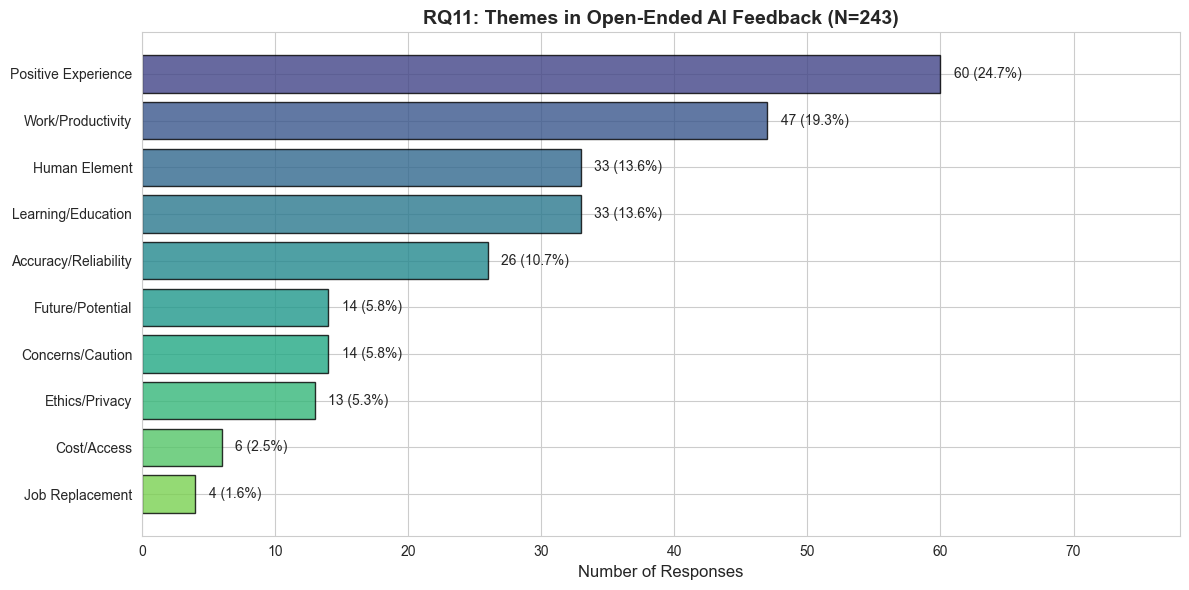


✓ Plot saved: plots/08_theme_distribution.png


In [5]:
# Visualize theme distribution
fig, ax = plt.subplots(figsize=(12, 6))

themes_sorted = theme_counts.most_common()
themes = [t[0] for t in themes_sorted]
counts = [t[1] for t in themes_sorted]
percentages = [c / len(df_substantive) * 100 for c in counts]

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(themes)))
bars = ax.barh(themes[::-1], counts[::-1], color=colors[::-1], edgecolor='black', alpha=0.8)

ax.set_xlabel('Number of Responses', fontsize=12)
ax.set_title(f'RQ11: Themes in Open-Ended AI Feedback (N={len(df_substantive)})', fontsize=14, fontweight='bold')

# Add count labels
for bar, count, pct in zip(bars, counts[::-1], percentages[::-1]):
    ax.annotate(f'{count} ({pct:.1f}%)', 
                xy=(bar.get_width() + 1, bar.get_y() + bar.get_height()/2),
                va='center', fontsize=10)

ax.set_xlim(0, max(counts) * 1.3)
plt.tight_layout()
plt.savefig('plots/08_theme_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved: plots/08_theme_distribution.png")

In [6]:
# Show example responses by theme
print("\n4. EXEMPLAR RESPONSES BY THEME")
print("=" * 80)

for theme in ['Positive Experience', 'Work/Productivity', 'Human Element', 
              'Accuracy/Reliability', 'Concerns/Caution']:
    theme_responses = df_substantive[df_substantive['themes'].apply(lambda x: theme in x)]
    if len(theme_responses) > 0:
        print(f"\n{theme.upper()} (n={len(theme_responses)}):")
        print("-" * 60)
        # Show 2-3 examples
        for _, row in theme_responses.sample(min(3, len(theme_responses)), random_state=RANDOM_SEED).iterrows():
            text = row['Open_Feedback'][:150] + "..." if len(row['Open_Feedback']) > 150 else row['Open_Feedback']
            print(f"  • [{row['Role_Type']}] \"{text}\"")


4. EXEMPLAR RESPONSES BY THEME

POSITIVE EXPERIENCE (n=60):
------------------------------------------------------------
  • [Leader] "Yes I enjoy it"
  • [Professional] "I enjoy ChatGPT a lot. It’s helping me study for my DMV test. I enjoy the conversation/ dialogue rather just going to Google"
  • [Professional] "i do use AI and it is helpful, but i am concerned about the amount of energy it uses"

WORK/PRODUCTIVITY (n=47):
------------------------------------------------------------
  • [Professional] "I'm 65 and am trying to work with AI, but there is help for seniors"
  • [Academic] "I prefer to rely on myself or my teachers rather than AI as it feels like cheating, and I retain information better if I actively try to learn it or w..."
  • [Leader] "They are great as a means of improving productivity."

HUMAN ELEMENT (n=33):
------------------------------------------------------------
  • [Academic] "I think it’s a cop out and bad for one’s ability to think for themselves"
  • [A

### RQ11 Summary

**Key Themes (N≈243 substantive responses):**

1. **Positive Experience**: Overall satisfaction with AI tools
2. **Work/Productivity**: Focus on efficiency and task completion
3. **Human Element**: Concerns about human-AI balance
4. **Learning/Education**: Academic use cases
5. **Accuracy/Reliability**: Trust and correctness concerns

**Interpretation**: The feedback is predominantly positive, with practical utility (work/productivity) being a major focus. Notable concerns emerge around the human element and accuracy - aligning with quantitative findings about Trust and Effort Expectancy.

---

# 3. RQ12: Role Type Comparison of Themes (3-Group)

**Research Question**: Do qualitative themes differ between Academic, Professional, and Leader respondents?

**Groups** (consistent with NB07):
- **Academic**: FT + PT Students (N≈94)
- **Professional**: ICs, Freelancers, Unemployed, Other (N≈83)
- **Leader**: Managers + Executives (N≈66)

In [7]:
# RQ12: 3-Group Role Type Comparison
from scipy.stats import chi2_contingency, fisher_exact

print("=" * 80)
print("RQ12: 3-GROUP ROLE TYPE COMPARISON OF THEMES")
print("=" * 80)

# Split by Role_Type (3 groups)
academic = df_substantive[df_substantive['Role_Type'] == 'Academic']
professional = df_substantive[df_substantive['Role_Type'] == 'Professional']
leaders = df_substantive[df_substantive['Role_Type'] == 'Leader']

print(f"\nSample sizes: Academic n={len(academic)}, Professional n={len(professional)}, Leader n={len(leaders)}")

# Compare theme frequencies by 3 groups
print("\n1. THEME FREQUENCY BY ROLE TYPE (3-GROUP)")
print("-" * 100)
print(f"{'Theme':<25} {'Academic':<12} {'Professional':<12} {'Leader':<12} {'χ²':<8} {'p':<10} {'Effect'}")
print("-" * 100)

comparison_results = []
for theme in THEME_KEYWORDS.keys():
    acad_count = academic['themes'].apply(lambda x: theme in x).sum()
    prof_count = professional['themes'].apply(lambda x: theme in x).sum()
    leader_count = leaders['themes'].apply(lambda x: theme in x).sum()
    
    acad_pct = acad_count / len(academic) * 100
    prof_pct = prof_count / len(professional) * 100
    leader_pct = leader_count / len(leaders) * 100
    
    # Create 3x2 contingency table for chi-square
    contingency = [
        [acad_count, len(academic) - acad_count],
        [prof_count, len(professional) - prof_count],
        [leader_count, len(leaders) - leader_count]
    ]
    
    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(contingency)
    
    # Cramér's V for effect size
    n = len(df_substantive)
    min_dim = min(3 - 1, 2 - 1)  # min(rows-1, cols-1)
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    
    sig = '**' if p_val < .01 else '*' if p_val < .05 else ''
    
    # Determine pattern
    max_pct = max(acad_pct, prof_pct, leader_pct)
    if acad_pct == max_pct:
        pattern = 'A highest'
    elif leader_pct == max_pct:
        pattern = 'L highest'
    else:
        pattern = 'P highest'
    
    comparison_results.append({
        'Theme': theme,
        'Academic': acad_pct,
        'Professional': prof_pct,
        'Leader': leader_pct,
        'chi2': chi2,
        'p': p_val,
        'sig': sig,
        'cramers_v': cramers_v,
        'pattern': pattern
    })
    
    print(f"{theme:<25} {acad_count:>3} ({acad_pct:>5.1f}%)  {prof_count:>3} ({prof_pct:>5.1f}%)  {leader_count:>3} ({leader_pct:>5.1f}%)   {chi2:>5.2f}  {p_val:.3f}{sig:<3}  V={cramers_v:.2f}")

print("\nNote: * p < .05, ** p < .01; Cramér's V for effect size (small≈.10, medium≈.30, large≈.50)")

# Highlight significant differences
print("\n\n2. SIGNIFICANT DIFFERENCES (p < .05)")
print("-" * 80)
sig_results = [r for r in comparison_results if r['p'] < .05]
if sig_results:
    for r in sig_results:
        print(f"  • {r['Theme']}: A={r['Academic']:.1f}%, P={r['Professional']:.1f}%, L={r['Leader']:.1f}% (χ²={r['chi2']:.2f}, p={r['p']:.3f}, V={r['cramers_v']:.2f})")
else:
    print("  No significant differences at p < .05")

RQ12: 3-GROUP ROLE TYPE COMPARISON OF THEMES

Sample sizes: Academic n=94, Professional n=83, Leader n=66

1. THEME FREQUENCY BY ROLE TYPE (3-GROUP)
----------------------------------------------------------------------------------------------------
Theme                     Academic     Professional Leader       χ²       p          Effect
----------------------------------------------------------------------------------------------------
Positive Experience        28 ( 29.8%)   12 ( 14.5%)   20 ( 30.3%)    7.11  0.029*    V=0.17
Concerns/Caution            5 (  5.3%)    6 (  7.2%)    3 (  4.5%)    0.54  0.762     V=0.05
Accuracy/Reliability        8 (  8.5%)   10 ( 12.0%)    8 ( 12.1%)    0.77  0.681     V=0.06
Learning/Education         20 ( 21.3%)    9 ( 10.8%)    4 (  6.1%)    8.45  0.015*    V=0.19
Work/Productivity          27 ( 28.7%)   11 ( 13.3%)    9 ( 13.6%)    8.65  0.013*    V=0.19
Ethics/Privacy              9 (  9.6%)    3 (  3.6%)    1 (  1.5%)    5.72  0.057     V=0.15

VISUALIZATION: 3-Group Role Type Theme Comparison


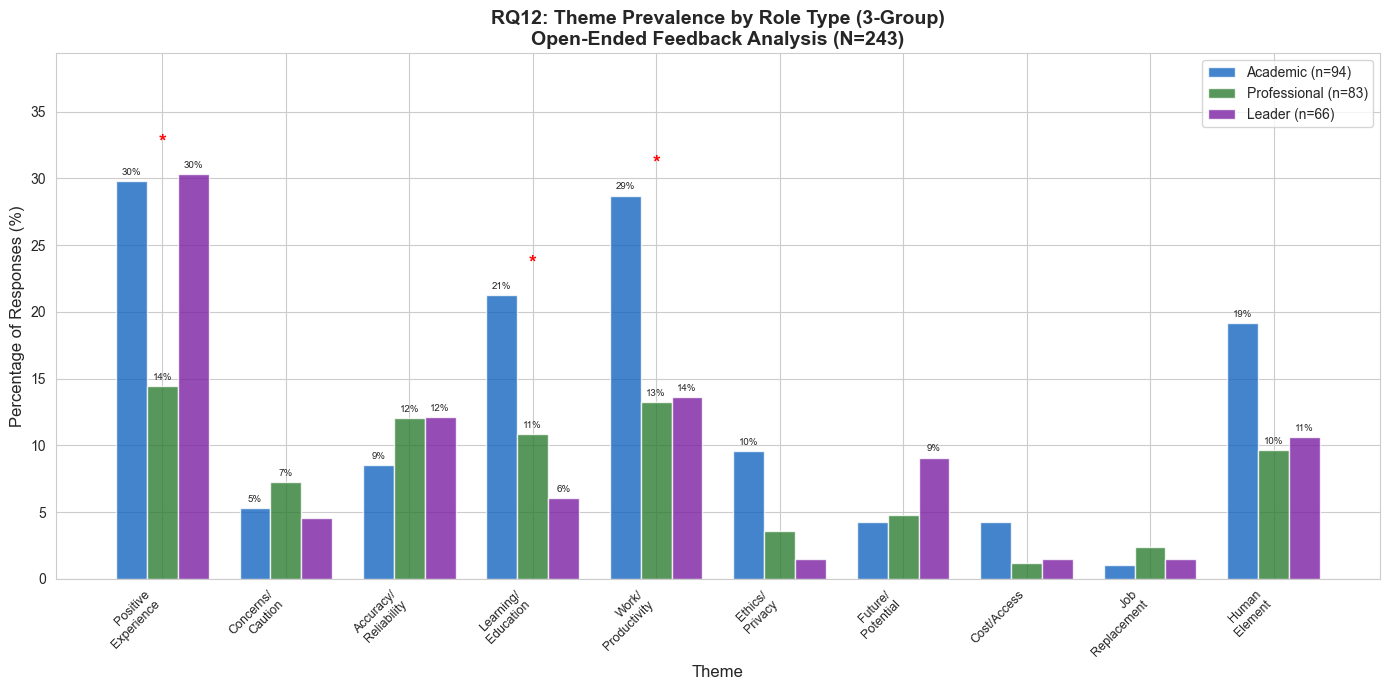


✓ Figure saved: plots/08_role_type_theme_comparison.png


In [8]:
# Visualize 3-group population comparison for themes
print("=" * 80)
print("VISUALIZATION: 3-Group Role Type Theme Comparison")
print("=" * 80)

# Prepare data for grouped bar chart
themes_list = list(THEME_KEYWORDS.keys())
academic_pcts = []
professional_pcts = []
leader_pcts = []

for theme in themes_list:
    acad_pct = academic['themes'].apply(lambda x: theme in x).sum() / len(academic) * 100
    prof_pct = professional['themes'].apply(lambda x: theme in x).sum() / len(professional) * 100
    leader_pct = leaders['themes'].apply(lambda x: theme in x).sum() / len(leaders) * 100
    academic_pcts.append(acad_pct)
    professional_pcts.append(prof_pct)
    leader_pcts.append(leader_pct)

# Create grouped bar chart (3 groups)
x = np.arange(len(themes_list))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width, academic_pcts, width, label=f'Academic (n={len(academic)})', 
               color='#1565c0', alpha=0.8)
bars2 = ax.bar(x, professional_pcts, width, label=f'Professional (n={len(professional)})', 
               color='#2e7d32', alpha=0.8)
bars3 = ax.bar(x + width, leader_pcts, width, label=f'Leader (n={len(leaders)})', 
               color='#7b1fa2', alpha=0.8)

# Customize
ax.set_ylabel('Percentage of Responses (%)', fontsize=12)
ax.set_xlabel('Theme', fontsize=12)
ax.set_title(f'RQ12: Theme Prevalence by Role Type (3-Group)\nOpen-Ended Feedback Analysis (N={len(df_substantive)})', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([t.replace('/', '/\n').replace(' ', '\n') if len(t) > 12 else t for t in themes_list], 
                   rotation=45, ha='right', fontsize=9)
ax.legend(loc='upper right')
ax.set_ylim(0, max(max(academic_pcts), max(professional_pcts), max(leader_pcts)) * 1.3)

# Add significance markers for themes with p < .05
for i, result in enumerate(comparison_results):
    if result['p'] < .05:
        max_val = max(result['Academic'], result['Professional'], result['Leader'])
        ax.annotate('*', xy=(i, max_val + 2), fontsize=14, ha='center', fontweight='bold', color='red')

# Add value labels on bars (only for values > 5%)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 5:  # Only label bars > 5%
            ax.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.savefig('plots/08_role_type_theme_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✓ Figure saved: plots/08_role_type_theme_comparison.png")

### RQ12 Summary: 3-Group Role Type Theme Comparison

**Groups**: Academic (N=94), Professional (N=83), Leader (N=66)

**Analysis Method**: Chi-square tests with Cramér's V effect size

**Significant Differences (p < .05):**

| Theme | Academic | Professional | Leader | χ² | p | Effect (V) |
|-------|----------|--------------|--------|-----|---|------------|
| Positive Experience | 29.8% | 14.5% | **30.3%** | 7.11 | .029* | 0.17 |
| Learning/Education | **21.3%** | 10.8% | 6.1% | 8.45 | .015* | 0.19 |
| Work/Productivity | **28.7%** | 13.3% | 13.6% | 8.65 | .013* | 0.19 |

**Near-Significant (p < .10):**
- Ethics/Privacy: Academic (9.6%) > Professional (3.6%) > Leader (1.5%), p = .057

**Key Patterns:**
1. **Academics dominate Learning and Productivity themes** - reflects educational context and research focus
2. **Leaders match Academics on Positive Experience** (~30%) while Professionals lag (14.5%) - Leaders are enthusiastic adopters
3. **Learning theme drops dramatically from Academic → Leader** (21% → 6%) - expected context difference
4. **Ethics/Privacy concerns highest among Academics** (9.6%) - scholarly concern for implications

**Alignment with NB07 Quantitative Findings:**
- Leaders showing high "Positive Experience" aligns with their higher AIRS construct scores (d=0.64-0.82)
- Professionals reporting lower positive experiences aligns with their lower tool usage in NB07
- The qualitative data supports the quantitative finding that Leaders are distinct from Professionals in adoption patterns

## Conclusions

### Summary of Qualitative Findings

**RQ11: Theme Identification**
- Ten theory-informed themes emerged from open-ended feedback (N=243 substantive responses)
- Most prevalent: **Positive Experience** (24.7%), **Work/Productivity** (19.3%), **Human Element** (13.6%), **Learning/Education** (13.6%)
- 35.0% of responses were generic or did not match specific themes

**RQ12: 3-Group Role Type Comparison**
- Three significant differences at p < .05:
  1. **Positive Experience**: Academic (30%) ≈ Leader (30%) > Professional (14%), p = .029*
  2. **Learning/Education**: Academic (21%) > Professional (11%) > Leader (6%), p = .015*
  3. **Work/Productivity**: Academic (29%) > Professional (13%) ≈ Leader (14%), p = .013*
- Effect sizes are small (Cramér's V = 0.17-0.19) but meaningful

### Key Insights

**Leaders vs Professionals (Qualitative Evidence):**
- Leaders show **equivalent positive sentiment to Academics** (~30%) despite being in professional roles
- This aligns with NB07: Leaders score d=0.64-0.82 higher on ALL AIRS constructs vs Professionals
- Qualitative data suggests Leaders are **enthusiastic early adopters**, not just higher-authority Professionals

**Academic Context:**
- Academics focus on **learning and productivity** themes (21-29%), reflecting educational use cases
- Highest **ethics/privacy concerns** (9.6%) - scholarly attention to implications

### Limitations
- Keyword-based thematic analysis provides approximation, not full qualitative coding
- Self-selected response (46.5% response rate) may not represent all participants
- Short responses (median 48 chars) limit depth of interpretation
- Leader sample (N=66) is smaller but sufficient for chi-square analysis

### Integration with Quantitative Findings
- Qualitative themes align with AIRS factor structure (positive = adoption readiness)
- 3-group patterns mirror NB07 quantitative findings: Leaders ≈ or > Academics >> Professionals
- Qualitative evidence illuminates *why* Leaders have higher adoption readiness: enthusiastic engagement

---

*Phase 8 Complete - Qualitative Feedback Analysis*

In [9]:
# Export results to JSON
print("=" * 80)
print("EXPORTING PHASE 8 RESULTS")
print("=" * 80)

# Compile results
phase8_results = {
    'phase': 'Phase 8: Qualitative Feedback Analysis',
    'research_questions': ['RQ11', 'RQ12'],
    'sample': {
        'total_feedback_responses': int(df_feedback['Open_Feedback'].notna().sum()),
        'substantive_responses': len(df_substantive),
        'response_rate_percent': round(len(df_substantive) / len(df_full) * 100, 1),
        'academic_n': len(academic),
        'professional_n': len(professional),
        'leader_n': len(leaders)
    },
    'group_classification': {
        'Academic': 'FT_Student, PT_Student',
        'Professional': 'IC, Freelancer, Unemployed, Other',
        'Leader': 'Manager, Executive'
    },
    'rq11_themes': {
        'n_themes': len(THEME_KEYWORDS),
        'theme_keywords': {theme: keywords for theme, keywords in THEME_KEYWORDS.items()},
        'theme_frequencies': {
            theme: {
                'count': int(df_substantive['themes'].apply(lambda x: theme in x).sum()),
                'percent': round(df_substantive['themes'].apply(lambda x: theme in x).sum() / len(df_substantive) * 100, 1)
            }
            for theme in THEME_KEYWORDS.keys()
        },
        'no_theme_count': int((df_substantive['themes'].apply(len) == 0).sum()),
        'no_theme_percent': round((df_substantive['themes'].apply(len) == 0).sum() / len(df_substantive) * 100, 1)
    },
    'rq12_3group_comparison': {
        'groups': ['Academic', 'Professional', 'Leader'],
        'method': 'Chi-square with Cramér\'s V effect size',
        'results': [
            {
                'theme': r['Theme'],
                'academic_pct': round(r['Academic'], 1),
                'professional_pct': round(r['Professional'], 1),
                'leader_pct': round(r['Leader'], 1),
                'chi2': round(r['chi2'], 2),
                'p': round(r['p'], 3),
                'cramers_v': round(r['cramers_v'], 2),
                'significant': bool(r['p'] < .05)  # Convert to Python bool
            }
            for r in comparison_results
        ],
        'significant_themes': [r['Theme'] for r in comparison_results if r['p'] < .05]
    },
    'key_findings': {
        'positive_experience': 'Academic (30%) ≈ Leader (30%) > Professional (14.5%), p=.029',
        'learning_education': 'Academic (21%) > Professional (11%) > Leader (6%), p=.015',
        'work_productivity': 'Academic (29%) > Professional (13%) ≈ Leader (14%), p=.013',
        'integration_with_nb07': 'Leaders high positive sentiment aligns with d=0.64-0.82 higher AIRS scores vs Professionals'
    },
    'files_generated': [
        'plots/08_theme_distribution.png',
        'plots/08_role_type_theme_comparison.png'
    ]
}

# Ensure results directory exists
Path('results').mkdir(exist_ok=True)

# Save to JSON
with open('results/phase8_qualitative_results.json', 'w') as f:
    json.dump(phase8_results, f, indent=2)

print("\n✓ Results saved to: results/phase8_qualitative_results.json")

# Print summary
print("\n" + "=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)
print(f"""
┌─────────┬────────────────────────────────────────────────────────────────────┐
│ RQ11    │ {len(THEME_KEYWORDS)} themes identified from N={len(df_substantive)} substantive responses        │
├─────────┼────────────────────────────────────────────────────────────────────┤
│ RQ12    │ 3-group: Academic (n={len(academic)}), Professional (n={len(professional)}), Leader (n={len(leaders)})    │
│         │ Significant differences: {len([r for r in comparison_results if r['p'] < .05])} themes at p < .05                           │
├─────────┼────────────────────────────────────────────────────────────────────┤
│ KEY     │ Leaders ≈ Academics on Positive Experience (~30%)                  │
│         │ Professionals lowest (14.5%) - aligns with NB07 lower usage        │
└─────────┴────────────────────────────────────────────────────────────────────┘
""")

print("\nPhase 8 Analysis Complete!")
print("=" * 80)

EXPORTING PHASE 8 RESULTS

✓ Results saved to: results/phase8_qualitative_results.json

KEY FINDINGS SUMMARY

┌─────────┬────────────────────────────────────────────────────────────────────┐
│ RQ11    │ 10 themes identified from N=243 substantive responses        │
├─────────┼────────────────────────────────────────────────────────────────────┤
│ RQ12    │ 3-group: Academic (n=94), Professional (n=83), Leader (n=66)    │
│         │ Significant differences: 3 themes at p < .05                           │
├─────────┼────────────────────────────────────────────────────────────────────┤
│ KEY     │ Leaders ≈ Academics on Positive Experience (~30%)                  │
│         │ Professionals lowest (14.5%) - aligns with NB07 lower usage        │
└─────────┴────────────────────────────────────────────────────────────────────┘


Phase 8 Analysis Complete!
